In [2]:
import os
import time
#  
import numpy as np
import random
from milvus import Milvus,MetricType, IndexType
SERVER_ADDR = '127.0.0.1'
SERVER_PORT = '19530'

In [5]:
client = Milvus(host=SERVER_ADDR, port=SERVER_PORT)
# create_milvus_collection(milvus)

In [6]:
#  ➜ sudo docker run -d --name milvus_cpu_1.1.0 \
# -p 19530:19530 \
# -p 19121:19121 \
# -v /home/$USER/milvus/db:/var/lib/milvus/db \
# -v /home/$USER/milvus/conf:/var/lib/milvus/conf \
# -v /home/$USER/milvus/logs:/var/lib/milvus/logs \
# -v /home/$USER/milvus/wal:/var/lib/milvus/wal \
# milvusdb/milvus:1.1.0-cpu-d050721-5e559c

In [7]:
client.list_collections()

(Status(code=0, message='Show collections successfully!'),
 ['demo_film_tutorial', 'siftsmall'])

In [7]:
collection_name = 'demo_film_tutorial'
collection_param = {
    "collection_name": collection_name,
    "dimension": 8,
    "index_file_size": 2048,
    "metric_type": MetricType.L2
}
client.create_collection(collection_param)

Status(code=0, message='Create collection successfully!')

In [7]:
client.list_collections()

(Status(code=0, message='Show collections successfully!'),
 ['demo_film_tutorial', 'siftsmall'])

In [ ]:
client.list_partitions(collection_name)

In [ ]:
client.create_partition(collection_name, "films")

In [ ]:
import random

In [ ]:
film_A = [random.random() for _ in range(8)]

In [ ]:
film_A

In [ ]:
entity_ids = [0, 1, 2]
entities = [[random.random() for _ in range(8)] for _ in range(3)]
status, ids = client.insert(collection_name, entities, entity_ids)

In [ ]:
status, results = client.search(collection_name, 2, [film_A])

In [ ]:
results

In [ ]:
ids

In [ ]:
client.create_index(collection_name, IndexType.FLAT)

In [ ]:
query_vectors = film_A

In [ ]:
query_vectors = [[1,2,3,4,5,6,7,8]]

In [ ]:
# FLAT
client.search(collection_name,1,query_vectors)

In [ ]:
status, info = client.get_collection_info(collection_name)

In [ ]:
info

In [ ]:
status, results = client.search(collection_name, 2, [film_A])

In [ ]:
status

In [ ]:
results

In [8]:
from bohb import *

In [9]:
from bohb import BOHB
import bohb.configspace as cs


def objective(step, alpha, beta):
    return 1 / (alpha * step + 0.1) + beta


def evaluate(params, n_iterations):
    loss = 0.0
    for i in range(int(n_iterations)):
        loss += objective(**params, step=i)
    return loss/n_iterations


alpha = cs.CategoricalHyperparameter('alpha', [0.001, 0.01, 0.1])
beta = cs.CategoricalHyperparameter('beta', [1, 2, 3])
configspace = cs.ConfigurationSpace([alpha, beta], seed=123)

opt = BOHB(configspace, evaluate, max_budget=10, min_budget=1)
logs = opt.optimize()
print(logs)


s_max: 3
s: 0
Budget: 10
Loss: 10.187714031754279
Configuration:
   Name: alpha | Value: 0.01
   Name: beta  | Value: 3

s: 1
Budget: 3.333333333333333
Loss: 7.111111111111111
Configuration:
   Name: alpha | Value: 0.1
   Name: beta  | Value: 1

Budget: 10.0
Loss: 3.9289682539682547
Configuration:
   Name: alpha | Value: 0.1
   Name: beta  | Value: 1

s: 2
Budget: 1.1111111111111112
Loss: 11.0
Configuration:
   Name: alpha | Value: 0.01
   Name: beta  | Value: 1

Budget: 3.3333333333333335
Loss: 7.111111111111111
Configuration:
   Name: alpha | Value: 0.1
   Name: beta  | Value: 1

Budget: 10.0
Loss: 3.9289682539682547
Configuration:
   Name: alpha | Value: 0.1
   Name: beta  | Value: 1

Best Hyperparameter Configuration:
Budget: 10.0
Loss: 3.9289682539682547
Configuration:
   Name: alpha | Value: 0.1
   Name: beta  | Value: 1



In [12]:
!pwd

/home/xiangpan/Labs/HOBO


In [91]:
import numpy as np
fv = numpy.fromfile("./cached_datasets/siftsmall/siftsmall_base.fvecs", dtype="int32")
dim = fv.view(numpy.int32)[0]
new = fv.reshape(-1, dim + 1)[:,1:] # reshapes file
f_new = new.view(numpy.float32)
np.save("./cached_datasets/siftsmall_numpy/siftsmall_base",f_new)

In [93]:
f_new

array([[ 0., 16., 35., ..., 25., 23.,  1.],
       [14., 35., 19., ..., 11., 21., 33.],
       [ 0.,  1.,  5., ...,  4., 23., 10.],
       ...,
       [48.,  1.,  0., ..., 22., 62., 18.],
       [ 0.,  0.,  0., ...,  3.,  3., 11.],
       [14.,  2.,  0., ...,  0.,  0.,  7.]], dtype=float32)

In [70]:
import numpy as np
fv = numpy.fromfile("./cached_datasets/siftsmall/siftsmall_groundtruth.ivecs", dtype="int32")
# dim = fv.view(numpy.int32)[0]
dim = 100
f_new = fv.reshape(-1, dim + 1)[:,1:] # reshapes file
# f_new = new.view(numpy.float32)
np.save("./cached_datasets/siftsmall_numpy/siftsmall_groundtruth",f_new)

In [60]:
fv = numpy.fromfile("./cached_datasets/siftsmall/siftsmall_groundtruth.ivecs", dtype="int32")

In [71]:
new

array([[2176, 3752,  882, ...,  348, 3043, 3687],
       [2781, 9574, 2492, ..., 3849, 2905, 4102],
       [2707, 9938, 2698, ..., 1251, 8564, 8173],
       ...,
       [8825, 9081, 6142, ..., 8178, 5887, 4565],
       [5460, 5439, 5810, ..., 5199, 7483, 5232],
       [8082, 8782, 4767, ...,   11, 2482, 3631]], dtype=int32)

In [29]:
import numpy as np
fv = numpy.fromfile("./cached_datasets/siftsmall/siftsmall_learn.fvecs", dtype="int32")
dim = fv.view(numpy.int32)[0]
new = fv.reshape(-1, dim + 1)[:,1:] # reshapes file
f_new = new.view(numpy.float32)
np.save("./cached_datasets/siftsmall_numpy/siftsmall_learn",f_new)

In [94]:
import numpy as np
fv = numpy.fromfile("./cached_datasets/siftsmall/siftsmall_query.fvecs", dtype="int32")
dim = fv.view(numpy.int32)[0]
new = fv.reshape(-1, dim + 1)[:,1:] # reshapes file
f_new = new.view(numpy.float32)
np.save("./cached_datasets/siftsmall_numpy/siftsmall_query",f_new)

In [96]:
f_new

array([[ 1.,  3., 11., ..., 42., 48., 11.],
       [40., 25., 11., ...,  3., 19., 13.],
       [28.,  4.,  3., ...,  2., 54., 47.],
       ...,
       [14.,  8.,  0., ..., 32., 14., 15.],
       [11., 48., 10., ...,  0.,  0.,  0.],
       [ 4., 10.,  5., ..., 43.,  0.,  8.]], dtype=float32)

In [72]:
docker

NameError: name 'docker' is not defined

# Connection

In [64]:
import os
import time
#  
import numpy as np
import random
from milvus import Milvus,MetricType, IndexType
SERVER_ADDR = '127.0.0.1'
SERVER_PORT = '19530'

host = '127.0.0.1'
port = '19530'
client = Milvus(host, port)

In [65]:
collection_name = 'siftsmall'
collection_param = {
    "collection_name": collection_name,
    "dimension": 128,
#     "index_file_size": 2048,
    "metric_type": MetricType.L2
}
client.create_collection(collection_param)

Status(code=0, message='Create collection successfully!')

In [66]:
client.list_collections()

(Status(code=0, message='Show collections successfully!'),
 ['demo_film_tutorial', 'siftsmall'])

# insert base into db

In [67]:
siftsmall_base = np.load("./cached_datasets/siftsmall_numpy/siftsmall_base.npy")

In [68]:
siftsmall_base.shape

(10000, 128)

In [69]:
entity_ids = [i for i in range(len(siftsmall_base))]
entities = siftsmall_base
collection_name = "siftsmall"

In [70]:
status, ids = client.insert(collection_name, entities, entity_ids)

# index build

In [19]:
client.create_index(collection_name, IndexType.IVF_FLAT, {"nlist": 100})
# int. 1~65536

Status(code=0, message='Build index successfully!')

# search query

## get_query 

In [26]:
siftsmall_query = np.load("./cached_datasets/siftsmall_numpy/siftsmall_query.npy")
query_vectors = siftsmall_query

In [27]:
collection_name = 'siftsmall'
statue, res = client.search(collection_name, top_k = 200, query_records = query_vectors, params={"nprobe": 1 })
# int. 1~nlist(cpu), 1~min[2048, nlist](gpu)

In [15]:
res

[
 [ (id:2176, distance:76608.0),
   (id:3752, distance:77004.0),
   (id:882, distance:79702.0),
   ...
   (id:479, distance:138081.0) ]

 [ (id:3136, distance:70189.0),
   (id:1038, distance:72748.0),
   (id:3998, distance:76825.0),
   ...
   (id:3289, distance:135931.0) ]

 [ (id:2707, distance:42740.0),
   (id:6801, distance:59501.0),
   (id:5171, distance:71136.0),
   ...
   (id:6909, distance:159583.0) ]

        ......
            ......
]

## result_convert

In [266]:
converted_res = np.zeros(res.shape)

In [267]:
for i in range(len(res)):
    for j in range(len(res[i])):
#         print(i,j,res[i][j].id)
        converted_res[i][j] = res[i][j].id

## get_groundtruth

In [34]:
siftsmall_groundtruth = np.load("./cached_datasets/siftsmall_numpy/siftsmall_groundtruth.npy")
siftsmall_groundtruth.shape
# query_vectors = siftsmall_query

(100, 100)

In [35]:
converted_res.shape

NameError: name 'converted_res' is not defined

# recall

In [254]:
from torchmetrics import RetrievalRecall
# import torch.tensor as tensor
indexes = torch.tensor([0, 0, 0, 1, 1, 1, 1])
preds = torch.tensor([0.2, 0.3, 0.5, 0.1, 0.3, 0.5, 0.2])
target = torch.tensor([False, False, True, False, True, False, True])
r2 = RetrievalRecall(k=100)
r2(preds, target, indexes=indexes)


tensor(1.)

In [270]:
preds = converted_res

In [271]:
target = siftsmall_groundtruth

In [272]:
preds

array([[2176., 3752.,  882., ..., 1699.,  270.,  479.],
       [3136., 1038., 3998., ..., 1401., 6138., 3289.],
       [2707., 6801., 5171., ..., 6065., 2876., 6909.],
       ...,
       [6142., 6234., 7467., ...,    0.,    0.,    0.],
       [5460., 5439., 5810., ..., 7876., 6354., 5360.],
       [8082., 8782., 4767., ...,    0.,    0.,    0.]])

In [28]:
class IVF_FLAT_build_config(object):
    nlist  = 2048

NameError: name 'self' is not defined

In [26]:
import json
a = IVF_FLAT_build_config()

In [27]:
json.dumps(a.__dict__)

'{"nlist": 2048}'

In [24]:
a = IVF_PQ_build_config()
a.nlist

2048

In [23]:
a

In [1]:
gDataDim = 512

In [11]:
a = [i for i in range(1,16) if 512%i == 0]

In [12]:
a

[1, 2, 4, 8]

In [2]:
import wandb
run = wandb.init()

wandb: Currently logged in as: xiang-pan (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.11.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [3]:
gTestTable = wandb.Table(columns = ["index_type", "query_per_sec", "accuracy"])

In [20]:
d = {i:0 for i in gTestTable.columns}

In [21]:
parmas = dict()

In [22]:
parmas["index_type"] = 1

In [23]:
parmas["query_per_sec"] = 1

In [24]:
for k,v in parmas.items():
    d[k] = v

In [45]:
list(d.keys())

['index_type', 'query_per_sec', 'accuracy', 'sss']

In [42]:
d["sss"] = 1

In [41]:
for k,v in d.items():
    if k not in gTestTable.columns:
        gTestTable.add_column(name = k, data = 0)

AssertionError: 

In [30]:
gTestTable.add_data([1,1,0,1])

ValueError: This table expects 3 columns: ['index_type', 'query_per_sec', 'accuracy'], found 1

In [39]:
gTestTable.columns

['index_type', 'query_per_sec', 'accuracy']

In [7]:
import wandb
run = wandb.init()
my_table = wandb.Table(columns=["a", "b"], data=[["1a", "1b"], ["2a", "2b"]])
# run.log({"table_key": my_table})

_runtime,49
_timestamp,1627595463
_step,2


_runtime,▁▄█
_timestamp,▁▄█
_step,▁▅█


In [8]:
my_table = wandb.Table(columns=["a", "b"], data=[["1a", "1b"], ["2a", "2b"]])
my_table.add_data("c","d")
run.log({"table_key": my_table})

In [1]:
from milvus import *

In [30]:
collection_name = "siftsmall"
status, stats = client. get_index_info(collection_name)

In [34]:
stats._index_type

<IndexType: IVF_FLAT>

In [36]:
stats._params

{'nlist': 2048}

# Generate LIST

[1,
 11,
 21,
 31,
 41,
 51,
 61,
 71,
 81,
 91,
 101,
 111,
 121,
 131,
 141,
 151,
 161,
 171,
 181,
 191,
 201,
 211,
 221,
 231,
 241,
 251,
 261,
 271,
 281,
 291,
 301,
 311,
 321,
 331,
 341,
 351,
 361,
 371,
 381,
 391,
 401,
 411,
 421,
 431,
 441,
 451,
 461,
 471,
 481,
 491,
 501,
 511,
 521,
 531,
 541,
 551,
 561,
 571,
 581,
 591,
 601,
 611,
 621,
 631,
 641,
 651,
 661,
 671,
 681,
 691,
 701,
 711,
 721,
 731,
 741,
 751,
 761,
 771,
 781,
 791,
 801,
 811,
 821,
 831,
 841,
 851,
 861,
 871,
 881,
 891,
 901,
 911,
 921,
 931,
 941,
 951,
 961,
 971,
 981,
 991,
 1001,
 1011,
 1021]

In [12]:
from option import *

In [54]:
hyperparameters['index_type'] = args.index_type
index_params = dict()
search_params = dict()
for b in build_keys:
    index_params[b.replace("build_","")] = vars(args)[b]
for s in search_keys:
    search_params[s.replace("search_","")] = vars(args)[s]

hyperparameters["index_params"] = index_params
hyperparameters["search_params"] = search_params

In [55]:
hyperparameters

{'index_type': 'IVF_FLAT',
 'index_params': {'nprobe': 100},
 'search_params': {'nlist': 100}}

In [2]:
import yaml

In [106]:
with open("./configs/search/HNSW.yaml", 'r') as stream:
    try:
        config = yaml.safe_load(stream)
        print(config)
    except yaml.YAMLError as exc:
        print(exc)

{'program': 'grid_search.py', 'method': 'grid', 'name': 'IVF_FLAT_search', 'metric': {'goal': 'minimize', 'name': 'loss'}, 'index_type': {'values': ['IVF_FLAT']}, 'parameters': {'index_params': {'nlist': {'values': 'range(1,1024,10)'}, 'ef': {'values': [1, 2]}}, 'search_params': {'nprobe': {'values': 'range(1,nlist,10)'}}}}


In [107]:
config['parameters']['index_params']

{'nlist': {'values': 'range(1,1024,10)'}, 'ef': {'values': [1, 2]}}

In [108]:
def constuct_for_loop():
    name = 'ef'
    i = 'range(1,1024,10)'
    s = 'for ' + name + ' in '+ i
    print(s)
    
    

In [114]:
for name in config['parameters']['index_params']:
    r = config['parameters']['index_params'][name]['values']

    if type(r) == 'str':
        r = list(eval(r))
    


In [95]:
name = 'ef'
i = 'range(1,1024,10)'
s = 'for ' + name + ' in '+ i + ':\n print(1)'
eval(s)

SyntaxError: invalid syntax (<string>, line 1)

In [96]:
iter('abc')

In [98]:
list(range(1,1024,10))

[1,
 11,
 21,
 31,
 41,
 51,
 61,
 71,
 81,
 91,
 101,
 111,
 121,
 131,
 141,
 151,
 161,
 171,
 181,
 191,
 201,
 211,
 221,
 231,
 241,
 251,
 261,
 271,
 281,
 291,
 301,
 311,
 321,
 331,
 341,
 351,
 361,
 371,
 381,
 391,
 401,
 411,
 421,
 431,
 441,
 451,
 461,
 471,
 481,
 491,
 501,
 511,
 521,
 531,
 541,
 551,
 561,
 571,
 581,
 591,
 601,
 611,
 621,
 631,
 641,
 651,
 661,
 671,
 681,
 691,
 701,
 711,
 721,
 731,
 741,
 751,
 761,
 771,
 781,
 791,
 801,
 811,
 821,
 831,
 841,
 851,
 861,
 871,
 881,
 891,
 901,
 911,
 921,
 931,
 941,
 951,
 961,
 971,
 981,
 991,
 1001,
 1011,
 1021]

TypeError: 'type' object is not iterable

# Visualization

## Load Data

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv("./grid_search_results/IVF_FLAT.csv")

In [22]:
df

,index_type,nlist,nprobe,recall,query_per_sec,loss
0,IVF_FLAT,101,1,35.03,13865.926146,6.010866e+06
1,IVF_FLAT,201,1,27.33,14441.206445,6.781441e+06
2,IVF_FLAT,301,1,24.88,14846.042758,7.026846e+06
3,IVF_FLAT,401,1,24.88,14262.944197,7.026263e+06
4,IVF_FLAT,501,1,24.88,14554.964084,7.026555e+06
...,...,...,...,...,...,...
1406,IVF_FLAT,16301,1201,100.00,8154.888885,8.159889e+03
1407,IVF_FLAT,16301,1301,100.00,8929.941025,8.934941e+03
1408,IVF_FLAT,16301,1401,100.00,8343.054920,8.348055e+03
1409,IVF_FLAT,16301,1501,100.00,8468.551123,8.473551e+03


In [23]:
data = df.to_numpy()

In [24]:
data.shape

(1411, 6)

<ipython-input-25-2d78d8a94cfa>:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


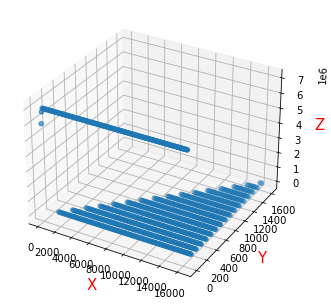

In [25]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
 
 
# 数据
x = data[:, 1]  
y = data[:, 2]  
z = data[:, -1]  
 
 
# 绘制散点图
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)
 
 
# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
plt.show()

<ipython-input-1-4b74946dc363>:32: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
/home/xiangpan/.conda/envs/pl/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 39034 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/xiangpan/.conda/envs/pl/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24207 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/xiangpan/.conda/envs/pl/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/xiangpan/.con

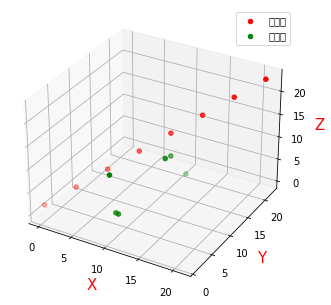

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图
 
 
# 数据
 
# 数据１
data1 = np.arange(24).reshape((8, 3))
# data的值如下：
# [[ 0  1  2]
#  [ 3  4  5]
#  [ 6  7  8]
#  [ 9 10 11]
#  [12 13 14]
#  [15 16 17]
#  [18 19 20]
#  [21 22 23]]
x1 = data1[:, 0]  # [ 0  3  6  9 12 15 18 21]
y1 = data1[:, 1]  # [ 1  4  7 10 13 16 19 22]
z1 = data1[:, 2]  # [ 2  5  8 11 14 17 20 23]
 
# 数据２
data2 = np.random.randint(0, 23, (6, 3))
x2 = data2[:, 0]
y2 = data2[:, 1]
z2 = data2[:, 2]
 
 
# 绘制散点图
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, y1, z1, c='r', label='顺序点')
ax.scatter(x2, y2, z2, c='g', label='随机点')
 
 
# 绘制图例
ax.legend(loc='best')
 
 
# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
 
 
# 展示
plt.show()